<a href="https://colab.research.google.com/github/josellregister/dataprac/blob/main/Week2Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install streamlit
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import matplotlib.cm as cm
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [41]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
folder = '/content/drive/MyDrive/bank-data' # Replace with the actual folder name
file_path = os.path.join(folder, 'netflix_titles.csv')

# Try reading the file with a different encoding, such as 'latin-1'
df = pd.read_csv(file_path, header=0, sep=',', encoding='latin-1')

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [45]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1111,s1112,Movie,Wild Child,Nick Moore,"Emma Roberts, Kimberley Nixon, Juno Temple, Li...","United States, United Kingdom, France","April 2, 2021",2008,PG-13,98 min,"Comedies, Romantic Movies","Accustomed to getting her way, a wealthy teena..."
4219,s4220,Movie,Back to the 90s,Yanyong Kuruaungkoul,"Dan Aaron Ramnarong, Pimchanok Leuwisetpaiboon...",Thailand,"January 1, 2019",2015,TV-14,111 min,"Comedies, International Movies, Music & Musicals",When a teenager is transported back to his par...
326,s327,Movie,Beethoven's 2nd,Rod Daniel,"Charles Grodin, Bonnie Hunt, Nicholle Tom, Chr...",United States,"August 1, 2021",1993,PG,88 min,"Children & Family Movies, Comedies",After St. Bernard Beethoven sires a brood with...
5997,s5998,Movie,2015 Dream Concert,NaN,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,"April 28, 2017",2015,TV-PG,107 min,"International Movies, Music & Musicals",The world's biggest K-pop festival marked its ...
334,s335,Movie,Five Feet Apart,Justin Baldoni,"Haley Lu Richardson, Cole Sprouse, MoisÃ©s Ari...",United States,"August 1, 2021",2019,PG-13,116 min,"Dramas, Romantic Movies",A teen with cystic fibrosis shakes up her dail...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.shape

(8807, 12)

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.describe(include='O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [14]:
list(df.type.unique())

['Movie', 'TV Show']

In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [16]:
df[df.duplicated(keep='first')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [17]:
df.drop_duplicates(keep='first',inplace=True)

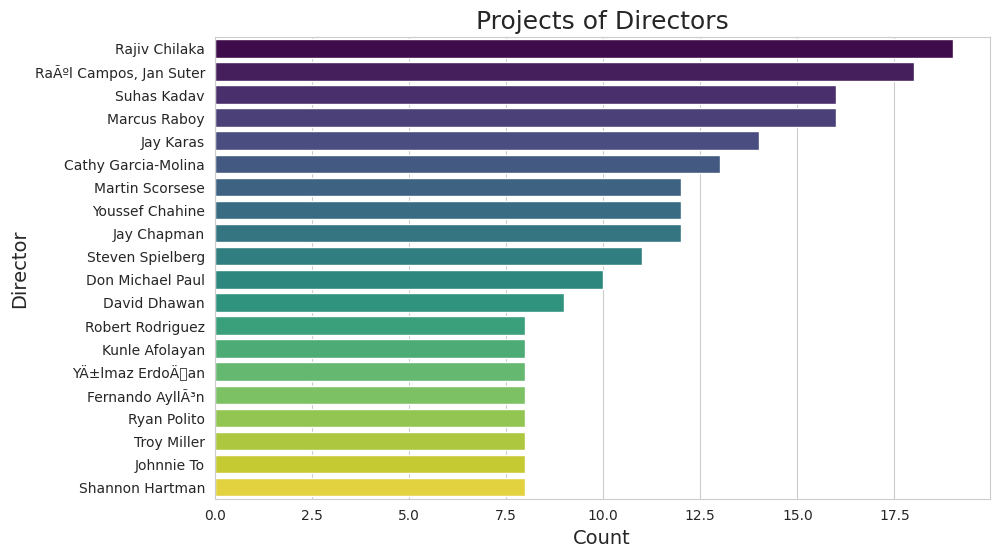

In [18]:
plt.figure(figsize=(10, 6))

# Get the top 20 directors
top_directors = df.director.value_counts().iloc[:20].index

# Create a colormap with a distinct color for each director
num_colors = len(top_directors)
colormap = cm.get_cmap('viridis', num_colors)  # Choose a colormap (e.g., 'viridis')
colors = [colormap(i) for i in range(num_colors)]

# Use the 'palette' argument to apply the colors to the bars
sns.countplot(y=df.director, order=top_directors, palette=colors)

plt.title('Projects of Directors', size=18)
plt.xlabel('Count', size=14)
plt.ylabel('Director', size=14)
plt.show()

In [19]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


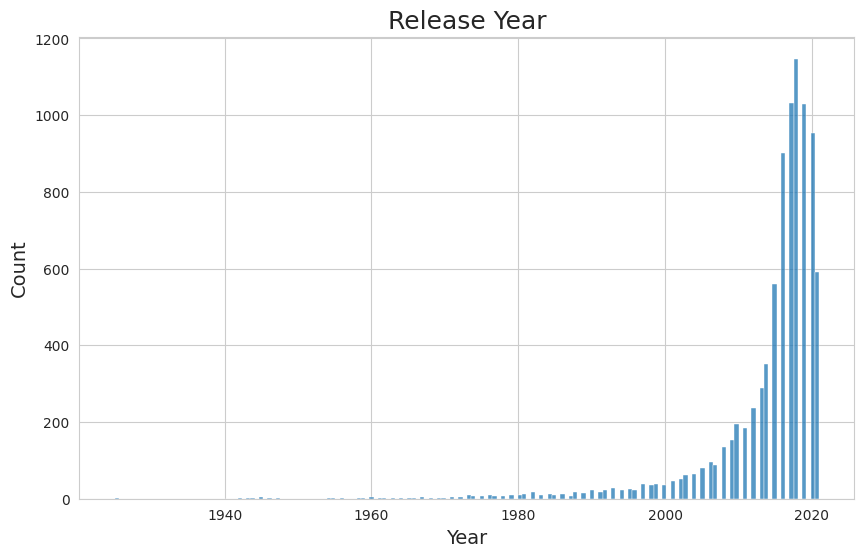

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df.release_year)
plt.title('Release Year',size=18)
plt.xlabel('Year',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [21]:
# Create separate DataFrames for movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

In [22]:
# Group TV shows by duration (number of seasons) and count the occurrences
tv_show_durations = tv_shows['duration'].value_counts()

# Display the results
print("TV Show Durations (Number of Seasons):")
print(tv_show_durations)

TV Show Durations (Number of Seasons):
duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
12 Seasons       2
15 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


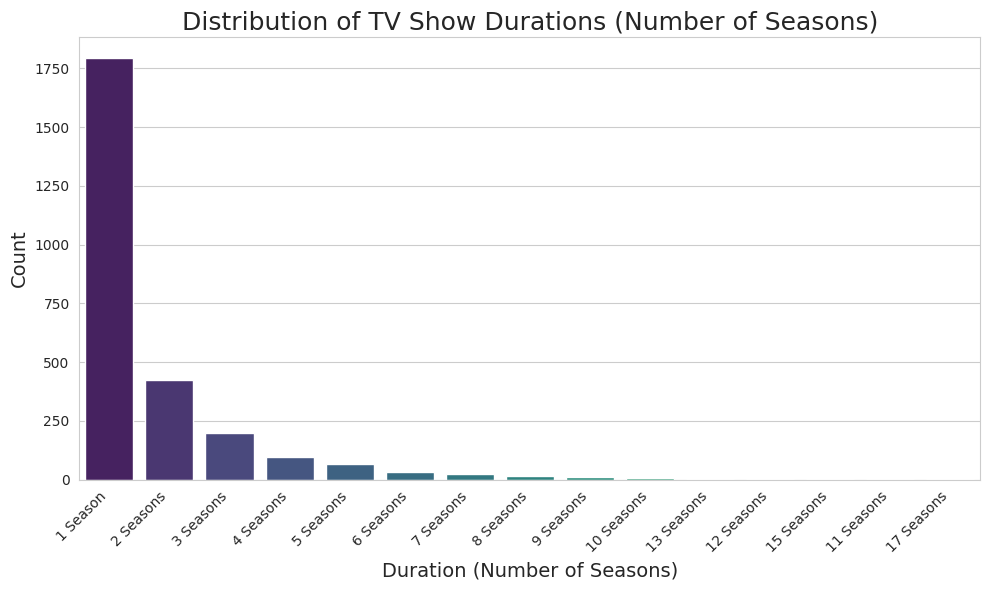

In [23]:
# Group TV shows by duration (number of seasons) and count the occurrences
tv_show_durations = tv_shows['duration'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=tv_show_durations.index, y=tv_show_durations.values, palette='viridis')
plt.title('Distribution of TV Show Durations (Number of Seasons)', size=18)
plt.xlabel('Duration (Number of Seasons)', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

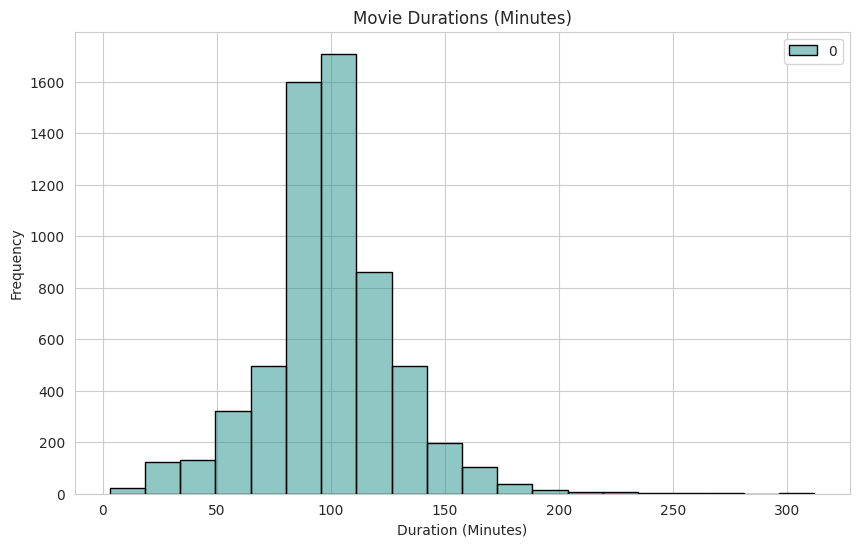

In [24]:
# Assuming 'duration' for movies is in minutes, you can directly analyze it
movie_durations = movies['duration'].astype(str).str.extract('(\d+)').astype(float)
movie_durations = movie_durations[movie_durations.notna()]

# Replace infinite values with NaN before conversion
movie_durations = movie_durations.replace([np.inf, -np.inf], np.nan).dropna().astype(int)

plt.figure(figsize=(10, 6))

# Create the histogram with different colors using seaborn
sns.histplot(movie_durations, bins=20, palette='viridis', edgecolor='black')

plt.title('Movie Durations (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

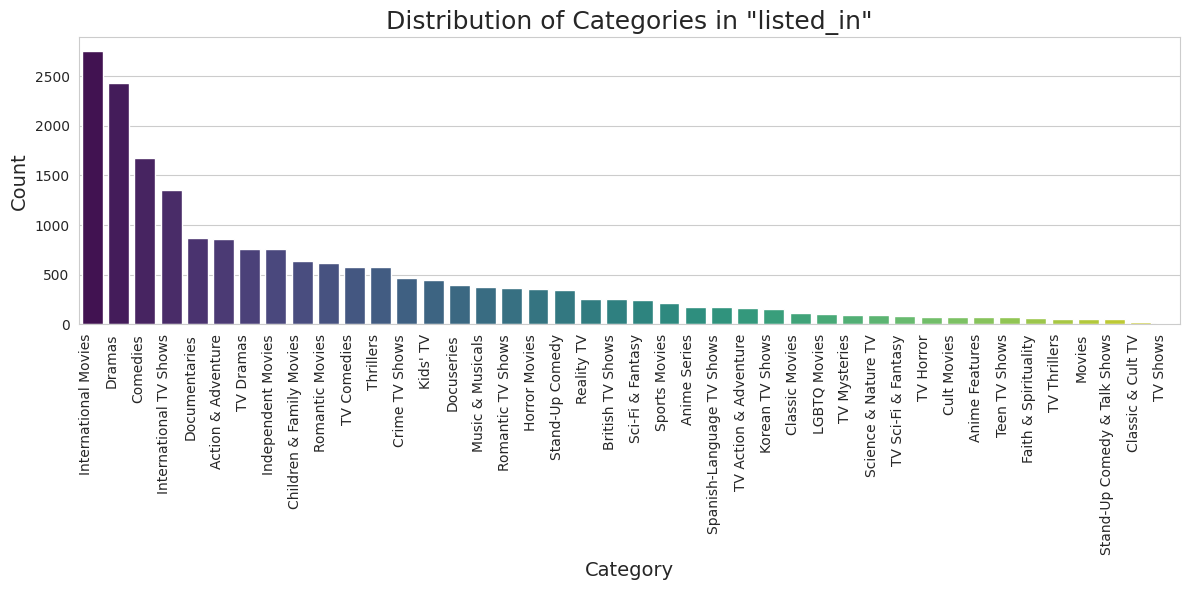

In [25]:
# ... (previous code to load and clean the DataFrame 'df') ...

# Split the categories in 'listed_in' and create a new DataFrame
categories = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('category')
category_counts = categories.value_counts()

# Create a bar chart to visualize the category counts
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categories in "listed_in"', size=18)
plt.xlabel('Category', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

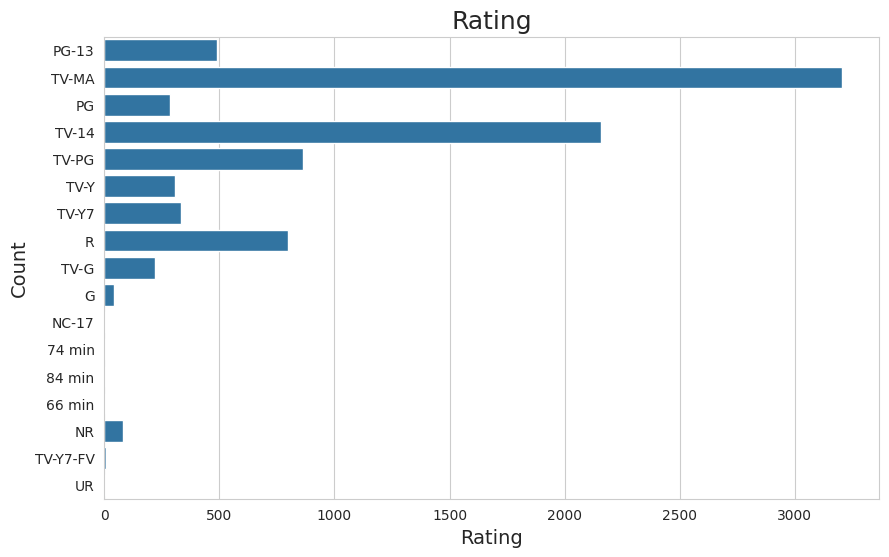

In [26]:
plt.figure(figsize = (10,6))
sns.countplot(df.rating)
plt.title('Rating',size=18)
plt.xlabel('Rating',size=14)
plt.ylabel('Count',size=14)
plt.show()

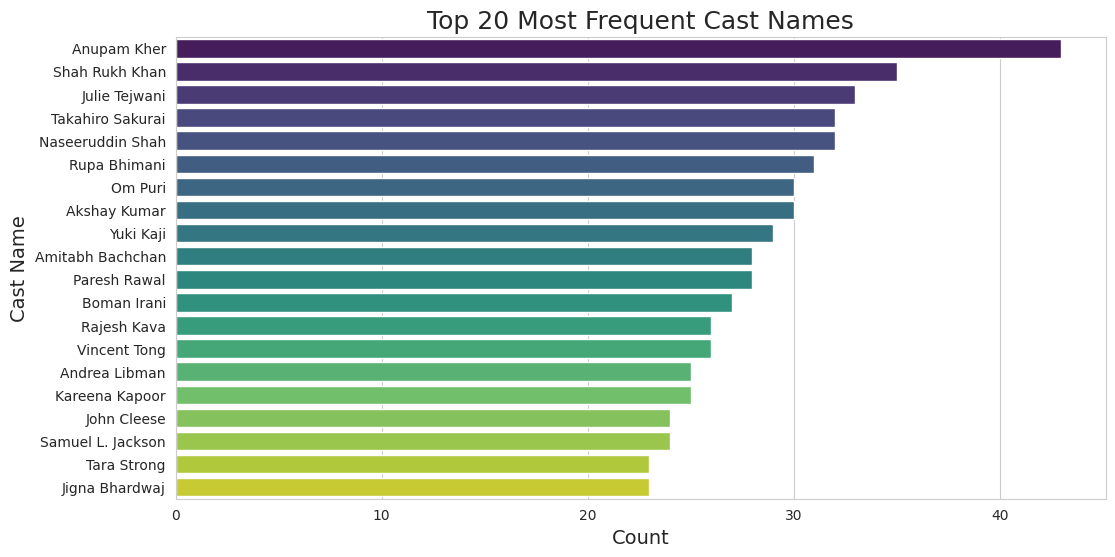

In [27]:
# Split the cast names and create a new DataFrame
cast_names = df['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('cast_name')

# Remove missing values (NaN)
cast_names = cast_names[cast_names != 'nan']
cast_names = cast_names.dropna()  # Remove any remaining missing values after removing 'nan' string

# Get the top N most frequent cast names (e.g., top 20)
top_cast_names = cast_names.value_counts().head(20).index

# Filter the DataFrame to include only the top cast names
filtered_cast = cast_names[cast_names.isin(top_cast_names)]

# Create a bar chart to visualize the top cast names
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(y='cast_name', data=filtered_cast.to_frame(), order=top_cast_names, palette='viridis')
plt.title('Top 20 Most Frequent Cast Names', size=18)
plt.xlabel('Count', size=14)
plt.ylabel('Cast Name', size=14)
plt.show()

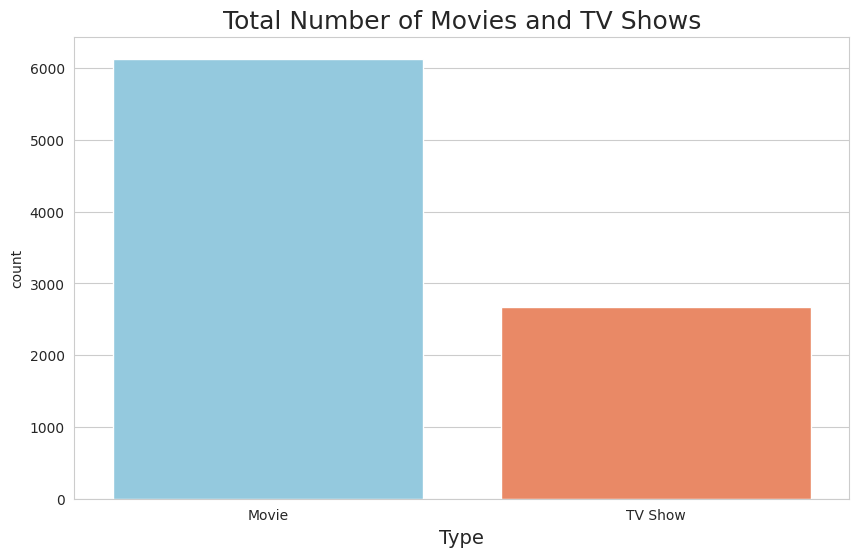

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'type', data = df, palette=['skyblue', 'coral'])  # Specify colors
plt.title('Total Number of Movies and TV Shows',size=18)
plt.xlabel('Type',size=14)
plt.show()

In [29]:
# Get the top N countries (e.g., top 10)
top_countries = df['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top countries
filtered_df = df[df['country'].isin(top_countries)]

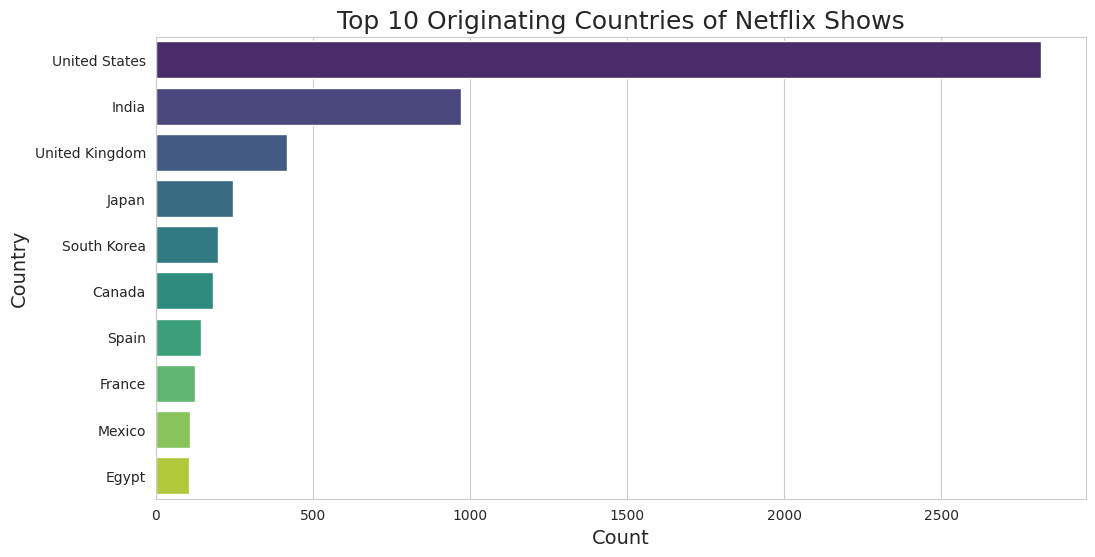

In [30]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Get the top N countries (e.g., top 10)
top_countries = df['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top countries
filtered_df = df[df['country'].isin(top_countries)]

# Now use filtered_df in the countplot
sns.countplot(y='country', data=filtered_df, order=top_countries, palette='viridis')
plt.title('Top 10 Originating Countries of Netflix Shows', size=18)
plt.xlabel('Count', size=14)
plt.ylabel('Country', size=14)
plt.show()

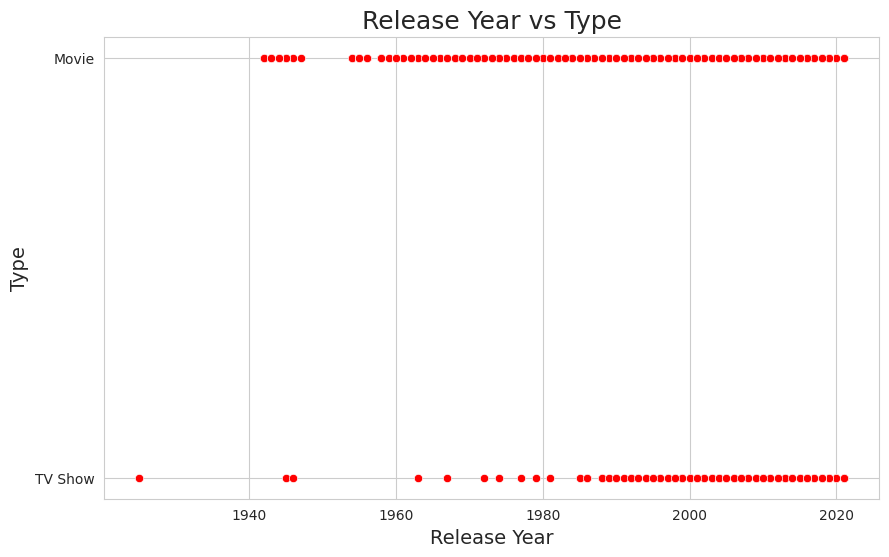

In [31]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='release_year',y='type',color='r',data=df)
plt.title('Release Year vs Type',size=18)
plt.xlabel('Release Year',size=14)
plt.ylabel('Type',size=14)
plt.show()

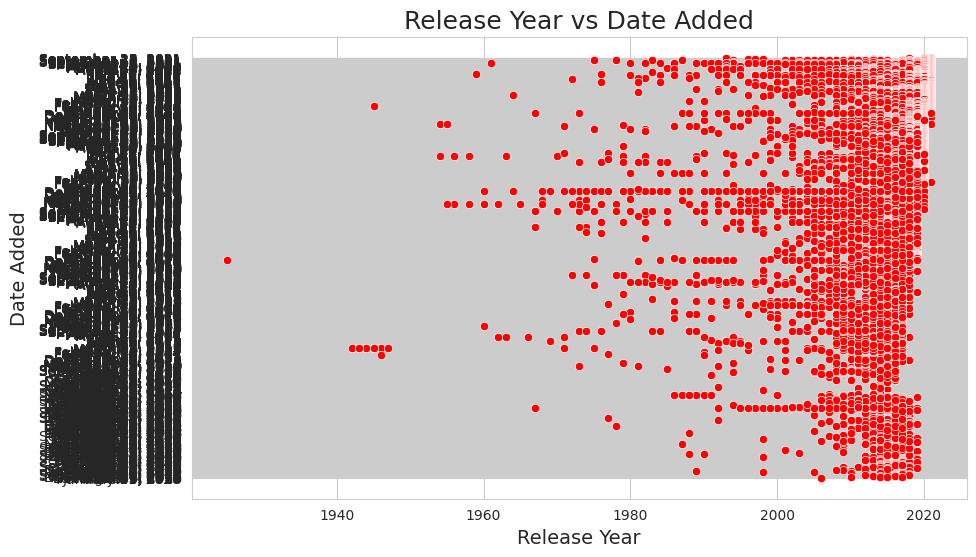

In [32]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='release_year',y='date_added',color='r',data=df)
plt.title('Release Year vs Date Added',size=18)
plt.xlabel('Release Year',size=14)
plt.ylabel('Date Added',size=14)
plt.show()

In [33]:
# Select only numeric features for correlation
numeric_features = df.select_dtypes(include=np.number).columns
correlation = df[numeric_features].corr()

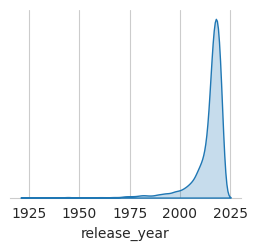

In [37]:
sns.pairplot(df,
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.7,
                                           'color': 'red'}},
                 corner=True);

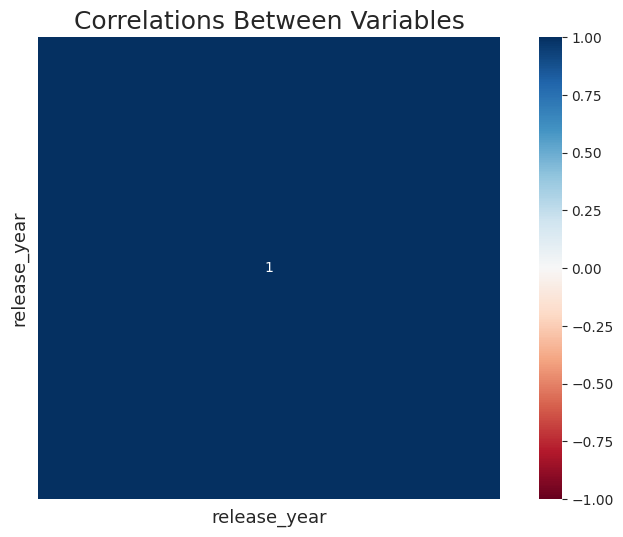

In [38]:
plt.figure(figsize = (10,6))
# Select only numeric features for correlation before calling .corr()
numeric_features = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numeric_features].corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

The data set shows that Rajiv chilaka has the most number of projects and year 2020 was the year that has the most number of movies and TV shows released on Netflix. The top 3 rating of the movies or TV shows are TV-MA, TV-14, and TV-G, making the TV-MA as the most common ratings of the films. The graph shows that Netflix has released more movies than TV shows. The country that has produced the most number of films is United States, followed by India. In terms of casst names, the Top 20 Cast names graph shows that Anupam Kher has the most number of shows in Netflix as a cast or actor.

After separating TV shows and Movies, the duration graphs shows that the majority of TV shows have 1 season and the majority of movies have 100 minutes.

Digging more of the details of "listed_in" column, the distribution graph shows that International movies iss the most used category where films were listed in and Netflix films have more drama category in comparison to comdedy.